<a href="https://colab.research.google.com/github/KONA1005/google_drive/blob/main/google_colab/Chapter_8_1%2C2%2C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망
- 422p
- 로지스틱 회귀 ( 일반 머신러닝 모형) : 81% 정확도 
- 인공신경망 도입 (딥러닝 초기모형) : 87% 정확도
- 합성곱(convolution, CNN) 이미지의 특성을 잡아내는(뽑는) 
  + 금일 코드 보다는 주요 용어 정리를 하는데 주력
  + 발전사 : alexnet 2012 -> resnet -> efficientnet
  + 핵심 : **채널, 이미지의 넓이, 크기(파라미터 튜닝)**
  + Vision Transformer 
  
- 비디오
  + 객체인식(Object Detection)
  + Yolo 논문

- RNN / LSTM (자연어 처리)
  + 구글에서 2017년에 Transformer논문 발표. 기가막힘
****

# 합성곱의 장점
- 기존에는 무조건 1차원 배열에서만 연산이 가능
- 2차원 배열에도 연산을 할 수 있도록 구현
  + 선형대수를 공부해야 하나요?

In [ ]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size = (3,3), activation = 'relu') # 커널사이즈 조정 가능

## 패딩의 목적
- (뽑으려는)이미지 손실이 일어나면 안되기 때문에 배열의 크기를 조절하더라도 이미지 원 특성이 손실되는 것을 방지하는것

In [ ]:
keras.layers.Conv2D(10, kernel_size = (3,3), 
                    activation = 'relu', padding= 'same', strides = 1)
# strides 칸수 이동

## 풀링
- 값을 추출하는 것

원래 100 * 100 이미지 -> (수치로) 주요 이미지의 특성만 뽑은 후, 원 이미지와 같게 만듬( 50*50 )


437p
- 1단계 : 이미지 데이터 입력
- 2단계 :  합성곱 층 만들기
   - (1). 필터 검. kernel_size(필터) + padding
   - (2). 활성화 함수 진행
   - (3). 각각의 특성맵 추출
- 3단계 : 풀링층
  + 최대풀링 (Max Pooling) 최댓값 뽑기
  + 최종 특성맵
- 위 과정을 계속 반복하는 것이 CNN 알고리즘
- 4단계 :  밀집층(Fully Connected Layer)
  + chapter 7 장에서 이미 배움
- 5단계 :  분류 예측값을 산출(Softmax 활성화함수)


주요 키워드 : 사전학습(Pretrained) / **전이학습**(Transfer Learning) / 파인튜닝(Fine Tuning)
  + 캐글 경진대회
  + 클래스 공부 필수


# 전이학습
- 하나의 작업을 위해 훈련된 모델을 유사 작업 수행 모델의 시작점으로 활용하는 딥러닝 접근법.
- 거대한 데이터셋으로 학습한 가중치의 일부를 능력이 유사하거나 새로운 분야의 신경망에 복사한 후, 그 상태로 재학습을 수행하는 것을 의미

- 필터 (Filter)

필터에 **해당하는 특징이 데이터에 있는지**를 검출해주는 함수.

이 필터를 기존의 데이터와 합성곱 연산을 진행하면 필터에 해당하는 특성을 갖고 있으면 결과 값으로 큰 값이 나오고, 특성을 가지지 않으면 결과값이 0에 가깝게 나오면서 입력데이터가 필터에 해당하는 특징을 갖고 있는지, 아닌지에 대한 여부를 알 수 있다.

- 패딩 (Padding)

합성곱 연산을 하기 이전, 입력데이터 주변을 **특정값으로 채워 늘리는** 것을 패딩(Padding)이라고 한다.

패딩(Padding)은 주로 **출력 데이터의 크기를 조정할 목적으로 사용**한다. 합성곱 연산을 반복하다보면 어느 시점부터는 출력 데이터의 크기가 1이 되어 더이상 합성곱 연산을 진행할 수 없게 된다. 패딩(Padding)을 사용하여 입력데이터의 외각의 크기를 늘려 출력 데이터의 크기가 줄어드는 것을 방지한다.

- 스트라이드 (Stride)

Stride는 입력데이터에 필터를 적용할 때 이동할 간격을 조절하는, 즉 **필터가 이동할 간격**을 뜻한다. Stride의 값을 키우면 키울수록 출력 데이터의 크기는 작아지며 Padding은 크게하면 할수록 출력 크기가 커진다.

- 풀링(Pooling)

세로, 가로 방향의 공간을 줄이는 연산
  + 특징 : 학습해야 할 매개변수가 없다, 채널수가 변하지 않는다, 입력의 변화에 영향을 적게 받는다.
  
파라미터를 줄이기 때문에 신경망의 표현력이 줄어들어 오버피팅을 억제하고 연산을 비교적 간단하게 만들어준다.


# 패션 MNIST 데이터 불러오기
- 데이터 스케일을 0 ~ 255사이 0 ~ 1로 표준화
- 훈련 데이터 / 검증 데이터 분류하고
- 완전 연결 신경망(Fully Connected Layer) --> 2차원배열을 1차원 배열로 만들어 줘야한다. ( 최종 분류값을 내기 위해 ) --> 합성곱에서는 2차원 이미지를 그대로 사용한다.


In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


# 합성곱 신경망 만들기

In [ ]:
model = keras.Sequential()

# 합성곱 층 만드는 과정
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

# 풀링층
model.add(keras.layers.MaxPooling2D(2)) # 2로 줄이겠다

# 합성곱 층
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', 
                              padding='same'))
# 풀링층
model.add(keras.layers.MaxPooling2D(2))

# 완전 연결층 (밀집층 = Fully Connected Layer)
# 챕터 7장에 나온 내용
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

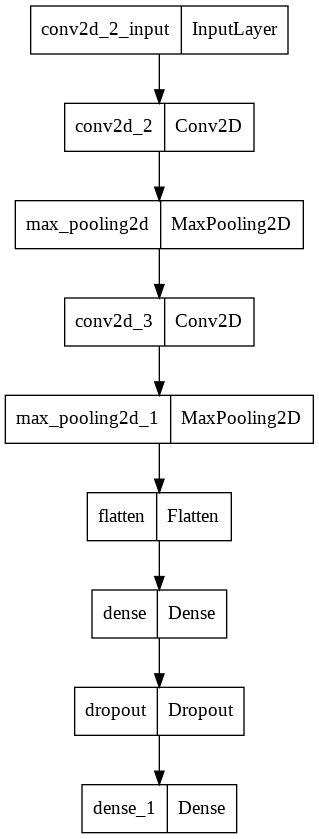

In [ ]:
keras.utils.plot_model(model)

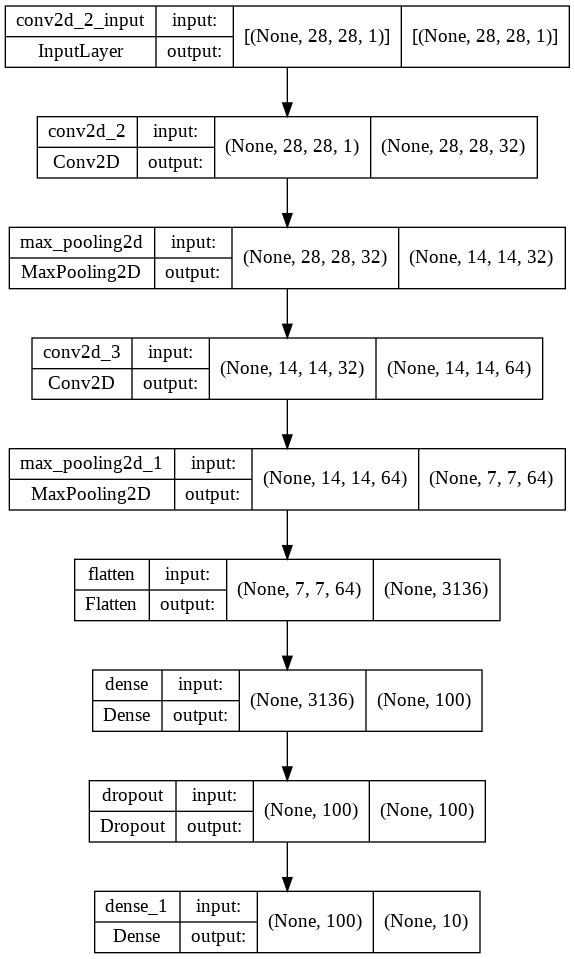

In [ ]:
keras.utils.plot_model(model, show_shapes = True)
# conv2d 에서 32 출력해서 2번재줄 28,28,32 된것

- 지금가지 한 것은 모델 정의
- 모델 컴파일 후, 훈련

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=10,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1698 - accuracy: 0.9381 - val_loss: 0.2254 - val_accuracy: 0.9222
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1598 - accuracy: 0.9413 - val_loss: 0.2435 - val_accuracy: 0.9181
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1477 - accuracy: 0.9444 - val_loss: 0.2334 - val_accuracy: 0.9221


- 모델 학습 곡선 그리기

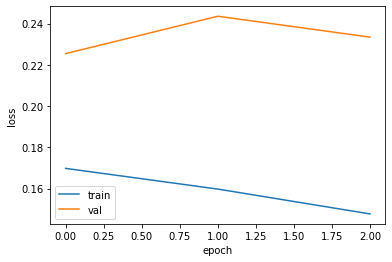

In [ ]:
# 453p

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 옆에 bst-cnn 모델 그거 떳음

# 합성곱 신경망 시각화
- 465p

In [ ]:
from tensorflow import keras
model2 = keras.models.load_model("best-cnn-model.h5")

keras.utils.plot_model(model2, show_shapes = True)
model.layers

- 합성곱 층의 가중치를 확인 가능

In [ ]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [ ]:
# 넘파이 배열
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.030418085 0.27079266


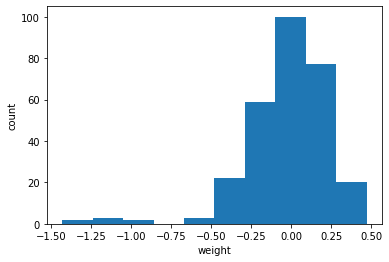

In [ ]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

- 468p

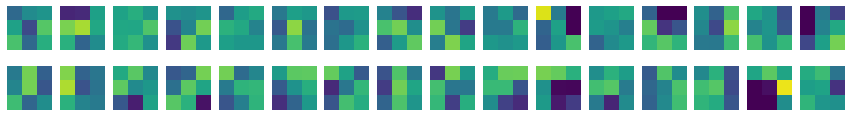

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()
# 어둡다 = 값이 없다
# 밝다 = 값이 많이 있다

In [ ]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                                          padding='same', input_shape=(28,28,1)))

In [ ]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.002512793 0.08349519


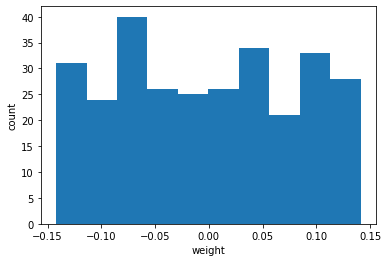

In [ ]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

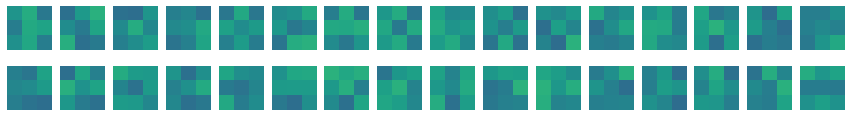

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

- 어두운색이 사라졋다 제대로 특징을 못잡았다 ( 훈련안한거 )

# 함수형 API
- 기존 모델가지고 다중출력 어려워서
- 474p

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_2_input'), name='conv2d_2_input', description="created by layer 'conv2d_2_input'")


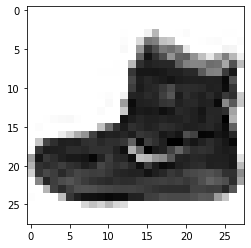

In [ ]:
print(model.input)
conv_acti = keras.Model(model.input, model.layers[0].output)
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [ ]:
# 스케일링 주고 뽑아내기

inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

(1, 28, 28, 32)


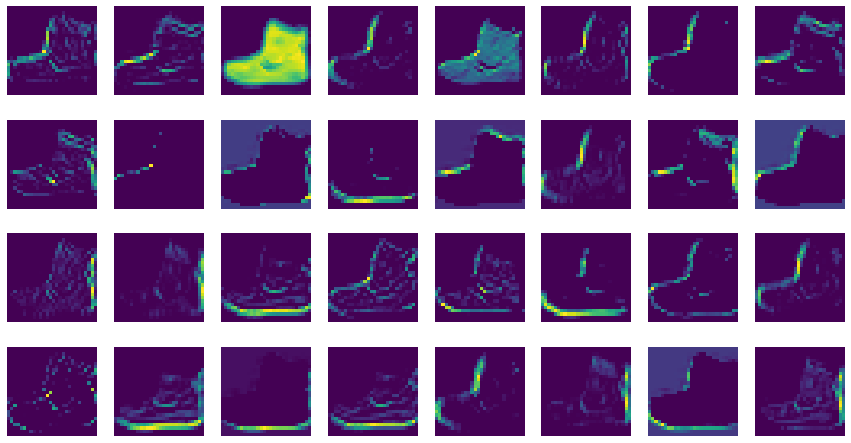

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

(1, 14, 14, 64)


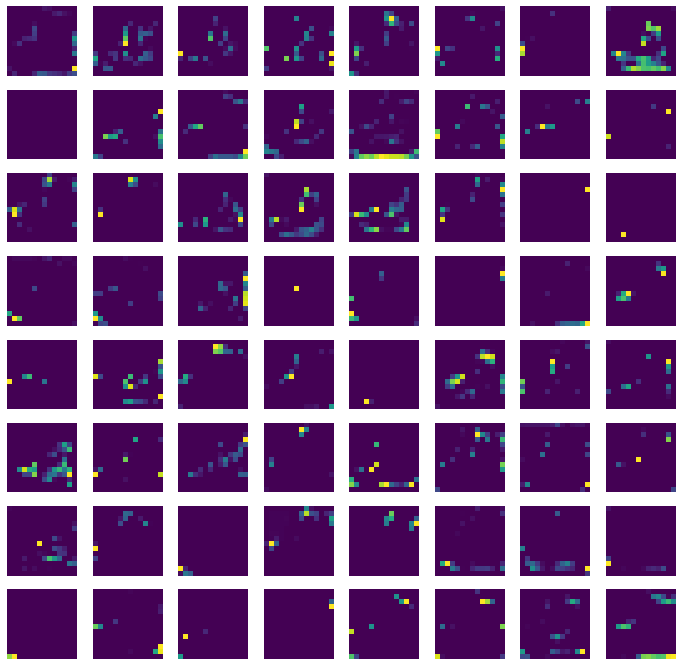

In [ ]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)
print(feature_maps.shape)

fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()
